In [3]:
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from sympy import *
from itertools import *

# №21

In [6]:
f = lambda x: x**2 - 3*abs(x) + 2

a, b, n = map(int, input('intut \'a b N\': ').split())
X = [a+i*(b-a)/n for i in range(n+1)]
Y = [f(x) for x in X]

for i in range(0, len(X)):
    print(round(X[i], 3), round(Y[i], 3))

intut 'a b N': -3 3 50
-3.0 2.0
-2.88 1.654
-2.76 1.338
-2.64 1.05
-2.52 0.79
-2.4 0.56
-2.28 0.358
-2.16 0.186
-2.04 0.042
-1.92 -0.074
-1.8 -0.16
-1.68 -0.218
-1.56 -0.246
-1.44 -0.246
-1.32 -0.218
-1.2 -0.16
-1.08 -0.074
-0.96 0.042
-0.84 0.186
-0.72 0.358
-0.6 0.56
-0.48 0.79
-0.36 1.05
-0.24 1.338
-0.12 1.654
0.0 2.0
0.12 1.654
0.24 1.338
0.36 1.05
0.48 0.79
0.6 0.56
0.72 0.358
0.84 0.186
0.96 0.042
1.08 -0.074
1.2 -0.16
1.32 -0.218
1.44 -0.246
1.56 -0.246
1.68 -0.218
1.8 -0.16
1.92 -0.074
2.04 0.042
2.16 0.186
2.28 0.358
2.4 0.56
2.52 0.79
2.64 1.05
2.76 1.338
2.88 1.654
3.0 2.0


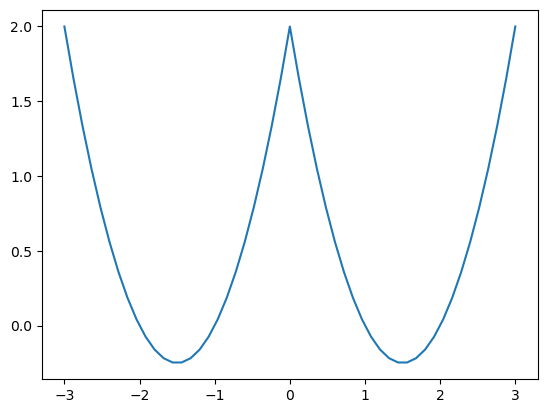

In [3]:
fig = plt.subplots()
plt.plot(X, Y)
plt.show()

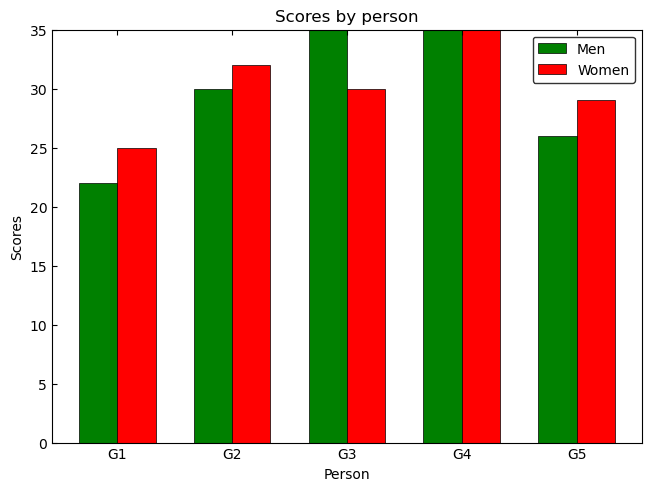

In [4]:
pecies = ('G1', 'G2', 'G3', 'G4', 'G5')
means = { 'Men': (22, 30, 35, 35, 26), 'Women': (25, 32, 30, 35, 29) }


width = 1
x = np.arange(0, len(pecies)*round(width*3, 3), round(width*3, 3))
multiplier = 0.5

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in means.items():
    offset = width * multiplier
    c = 'red'
    if attribute == 'Men':
        c = 'green'
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c, edgecolor='black', linewidth=0.5)
    multiplier += 1

ax.set_ylabel('Scores')
ax.set_title('Scores by person')
ax.set_xlabel('Person')

ax.set_xticks(x + width, pecies)
ax.tick_params(bottom=False)
ax.tick_params(top=True, direction='in')

ax.legend(loc='upper right', edgecolor='black')
ax.set_ylim(0, 35)    #???

plt.show()

# №22

In [91]:
f = lambda x: 2*x**2 - 8*x - 7

In [92]:
# пункт 1 поразрядного поиска
a, b, n = (0, 3, 500)
step = abs(a-b)/n

dt, prev = {}, 999999
for i in np.arange(a, b+step, step):
    if f(i) >= prev:
        break
    dt[i] = prev = f(i)
x1 = list(dt.items())[-1][0]


dt2, prev = {}, 999999
for i in np.arange(x1, x1-step, -step/4):
    if f(i) >= prev:
        break
    dt2[i] = prev = f(i)
    
l1 = list(dt2.items())[-1][0]
list(dt2.items())[-1]

(1.998, -14.999991999999999)

In [93]:
# пункт 2 дихотомии
a, b = (0, 3)
step, n = (b-a)/2, 0

while True:
    x1, x2 = (a+b-step)/2, (a+b+step)/2
    n += 1
    
    x1_p, x2_p = f(x1), f(x2)
    if x1_p <= x2_p:
        b = x2
    else:
        a = x1


    if (b-a)/2 >= step:
        break
    
    step = (b-a)/2
    
l2 = (a, b)
print(f'Диапазон от f{a} до {b} c {n} вычислениями')
print(f'Значения a и b: {f(a)}, {f(b)}')

Диапазон от f1.99999997423088 до 1.9999999742308807 c 126 вычислениями
Значения a и b: -14.999999999999998, -15.0


In [96]:
# пункт 3 золотого сечения
a, b = -3, 3
x1 = a + (3-5**0.5)/2*(b-a)
x2 = a + (5**0.5 - 1)/2*(b-a)

r = (5**0.5-1)/2
h = (b-a)/2


while True:
    if h > 10**(-10):
        if f(x1) <= f(x2):
            b=x2
            x2=x1
            x1=b-r*(b-a)
        else:
            a=x1
            x1=x2
            x2=a+r*(b-a)
        h = r*h
    else:
        break
    
l3 = (a+b)/2
l3, f(l3)

(1.9999999742830719, -15.0)

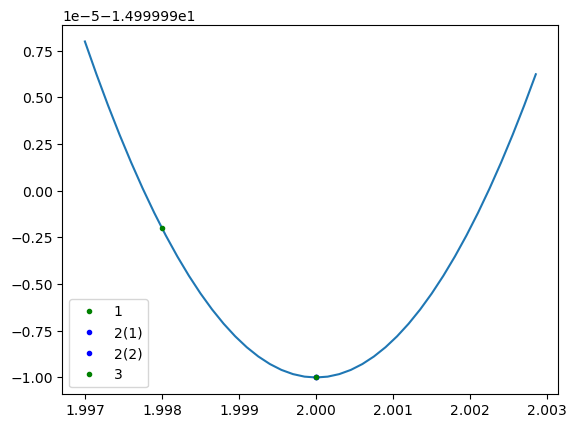

In [97]:
# график
a, b, n = l2[0]-0.003, l2[0]+0.003, 40

X = np.arange(a, b, abs(a-b)/n)
Y = [f(x) for x in X]

fig, ax = plt.subplots()
plt.plot(X, Y)
ax.plot(l1, f(l1), 'go', label='1', markersize=3)
ax.plot(l2[0], f(l2[0]), 'bo', label='2(1)', markersize=3)
ax.plot(l2[1], f(l2[1]), 'bo', label='2(2)', markersize=3)
ax.plot(l3, f(l3), 'go', label='3', markersize=3)
ax.legend()

plt.show()

In [4]:
# № 2 f(x)=x3+4x2−4x+1, x in [−1,2].
f = lambda x: x**3 + 4*x**2 - 4*x + 1

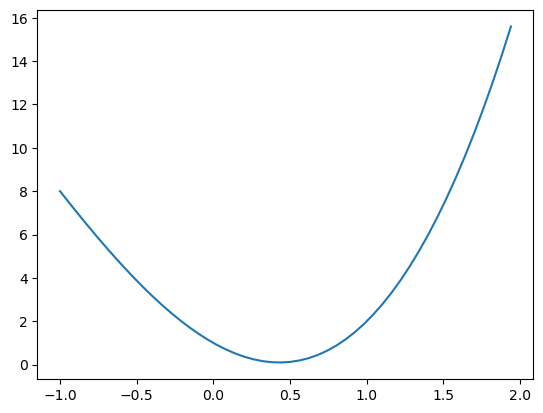

In [6]:
a, b, n = -1, 2, 50

X = np.arange(a, b, abs(a-b)/n)
Y = [f(x) for x in X]

fig, ax = plt.subplots()
plt.plot(X, Y)

plt.show()

In [99]:
# №2
e = 10**(-5)
x1 = a
x2 = (a + b) / 2 + e
x3 = b/100
while (x3 - x1) >= e:
    c1 = (f(x2) - f(x1)) / (x2 - x1)
    c2 = (1 / (x3 - x2)) * ((f(x3) - f(x1)) / (x3 - x1) - (f(x2) - f(x1)) / (x2 - x1))
    nx = (x1 + x2 - c1 / c2)/2
    for i, j, k, l in permutations([x1, x2, x3, nx]):
        if f(i) >= f(j) <= f(k):
            x1, x2, x3, nx = i, j, k, l
print((x1 + x2)/2, f((x1 + x2)/2))

1.99850497423088 -14.9999955297959


In [59]:
# №3 метод средней точки
e = 0.00001
x = symbols('x')
f = 2*cos(x) - sin(x)/2
f2 = lambda y: f.diff().subs(x, y)

def hz(a, b):
    x1 = (a + b) / 2
    fx = f2(x1)
    if abs(fx) <= e:
        return x1, f.subs(x, x1)
    if fx > 0:
        b = x1
    else:
        a = x1
    return hz(a, b)
p1 = hz(2, 4)
p1

(2.8966140747070312, -2.06155281280882)

In [60]:
# , метод хорд
a, b = 2, 4

def hrd():
    global a, b
    while True:
        x1 = a - f2(a) / (f2(a) - f2(b)) * (a - b)
        if abs(f2(x1)) <= 0.04:
            return x1, f.subs(x, x1)
        if f2(x1) > 0:
            b = x1
        else:
            a = x1

p2 = hrd()[0].evalf()
p2

2.89143640734466

In [61]:
# метод Ньютона
xk = 3

def newton():
    global xk
    while True:
        xk1 = xk - f2(xk) / f.diff().diff().subs(x, xk)
        if abs(f2(xk1)) <= e:
            return xk1, f.subs(x, xk1)
        xk = xk1

p3 = newton()[0].evalf()
p3

2.89661399047980

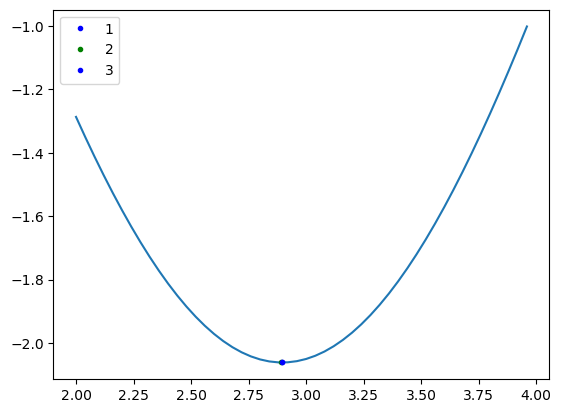

In [67]:
a, b, n = 2, 4, 50
f = lambda x: 2*cos(x) - sin(x)/2

X = np.arange(a, b, abs(a-b)/n)
Y = [f(x) for x in X]

fig, ax = plt.subplots()
plt.plot(X, Y)
ax.plot(p1[0], f(p1[0]), 'bo', label='1', markersize=3)
ax.plot(p2, f(p2), 'go', label='2', markersize=3)
ax.plot(p3, f(p3), 'bo', label='3', markersize=3)
ax.legend()

plt.show()

# №23

Класс – параллелепипед. Методы – расчет площади поверхности и объема параллелепипеда. Поля – ребра a , b , c , площадь и объем.

In [2]:
class p(object):
    "help:\nf1 = p(1,2,3)\nf1.square\nf1.volume()"
    def __init__(self, a, b, c):
        self.a, self.b, self.c = a, b, c
    
    def square(self):
        return 2 * (self.a*self.b + self.a*self.c + self.b*self.c)
    
    def volume(self):
        return self.a*self.b*self.c

In [3]:
f1 = p(2, 5, 4)
f1.square(), f1.volume()

(76, 40)

# №24

Опишите класс Account. Для банковского счета задаются фамилия владельца, номер счёта, процент начисления за год и сумма в рублях. Включите в описание класса методы: пополнения счёта, снятия денег со счёта, перевода суммы в доллары и в евро, а также свойство, позво- ляющее начислить процент за заданное количество месяцев.

In [153]:
class Account(object):
    "help here"
    ch = {'rubeur': 0.012567, 'eurrub': 1/0.012567, 'rubusd': 0.013385, 'usdrub': 1/0.013385, 'usdeur': 0.94073, 'eurusd': 1/0.94073}
    
    
    def __init__(self, surname, account, pr=0.032):
        self.surname = surname
        self.account = account
        self.percentage = pr
        self.bl = {'rub': 0, 'usd': 0, 'eur': 0}
        
    def deposit(self, bill, amount):
        if self.bl.get(bill) != None:
            self.bl[bill] += amount
        else:
            print('er 1')
            
    def withdraw(self, bill, amount):
        if self.bl.get(bill) != None:
            self.bl[bill] -= amount
        else:
            print('er 2')
    
    def change(self, bill1, bill2, amount):
        if self.bl.get(bill1) != None and self.bl.get(bill2) != None:
            self.withdraw(bill1, amount)
            self.deposit(bill2, round(amount * self.ch[bill1+bill2], 3))
        else:
            print('er 3')
            
    def percent(self, months):
        for k,v in self.bl.items():
            self.bl[k] = round(v * (1 + self.percentage*months/12), 3)

In [154]:
h1 = Account('Gale', '4567-9843-3295-3434')
h1.deposit('rub', 241750)
h1.withdraw('rub', 750)
h1.percent(12)

h1.bl

{'rub': 248712.0, 'usd': 0.0, 'eur': 0.0}

In [155]:
h1.change('rub', 'eur', 175000)
h1.change('eur', 'usd', 900)

h1.bl

{'rub': 73712.0, 'usd': 956.704, 'eur': 1299.225}

# №25

Создайте класс ИГРУШКА с методами, позволяющими вывести на эк- ран информацию о товаре, а также определить соответствие игрушки критерию поиска. Создайте дочерние классы КУБИК (цвет, цена, мате- риал, размер ребра), МЯЧ (цена, цвет, диаметр, материал), МАШИНКА (название, цена, производитель, цвет) со своими методами вывода ин- формации на экран и определения соответствия заданному цвету. Соз- дайте список из n игрушек, выведите полную информацию из базы на экран, а также организуйте поиск игрушек заданного цвета.

In [206]:
class toy(object):
    def __init__(self, cost, color):
        self.cost, self.color = cost, color
        
    def is_color(self, c):
        return True if self.color == c else False
        
    def info(self):
        return (f'Toy name: {type(self).__name__}; Cost: {self.cost}; Color: {self.color}')

    
class cube(toy):
    def __init__(self, cost, color, mat, edge):
        super().__init__(cost, color)
        self.mat, self.edge = mat, edge
    
    def info(self):
        return (f'{super().info()}; Material: {self.mat}; Edge: {self.edge}')

    
class ball(toy):
    def __init__(self, cost, color, mat, diam):
        super().__init__(cost, color)
        self.mat, self.diam = mat, diam
    
    def info(self):
        return (f'{super().info()}; Material: {self.mat}; Diameter: {self.diam}')

    
class car(toy):
    def __init__(self, cost, color, name, prod):
        super().__init__(cost, color)
        self.name, self.prod = name, prod
    
    def info(self):
        return (f'{super().info()}; Model: {self.name}; Producer: {self.prod}')

In [207]:
data = np.array([cube(100, 'red', 'wood', 10),
     ball(85, 'blue', 'wood', 6),
     car(145, 'red', 'Mark 2', 'Best Buy'),
     car(145, 'blue', 'Mark 1', 'Best Buy'),
     ball(140, 'green', 'steel', 4),
     car(175, 'green', 'Lanser X', 'Best Buy')])

In [208]:
# инфо о товаре
print(data[0].info())

Toy name: cube; Cost: 100; Color: red; Material: wood; Edge: 10


In [209]:
# опред. цвет
data[0].is_color('red'), data[3].is_color('green')

(True, False)

In [210]:
# вывод все дб
list(map(lambda x: x.info(), data))

['Toy name: cube; Cost: 100; Color: red; Material: wood; Edge: 10',
 'Toy name: ball; Cost: 85; Color: blue; Material: wood; Diameter: 6',
 'Toy name: car; Cost: 145; Color: red; Model: Mark 2; Producer: Best Buy',
 'Toy name: car; Cost: 145; Color: blue; Model: Mark 1; Producer: Best Buy',
 'Toy name: ball; Cost: 140; Color: green; Material: steel; Diameter: 4',
 'Toy name: car; Cost: 175; Color: green; Model: Lanser X; Producer: Best Buy']

In [211]:
# отсеивание по цвету
f = np.array(list(map(lambda x: x.color, data)))
data[f=='green'], list(map(lambda x: x.info(), data[f=='green']))

(array([<__main__.ball object at 0x7fa1b840d0d0>,
        <__main__.car object at 0x7fa1b840d190>], dtype=object),
 ['Toy name: ball; Cost: 140; Color: green; Material: steel; Diameter: 4',
  'Toy name: car; Cost: 175; Color: green; Model: Lanser X; Producer: Best Buy'])

# №26

а) Вывести ряд Фибоначчи до n чисел, используя лямбда-функцию.

б) Найти следующее после заданного число, полученное перестановкой цифр заданного числа. Примеры: 12 → 21, 10 → False, 201 → 210, 102 → 120, 445 → 454.

в) Напишите программу для поиска элементов заданного списка строк, содержащих определённую подстроку, используя лямбда-функцию. Пример: ['red', 'black', 'white', 'green', 'orange']; ack → ['black']; abc → [].

In [186]:
f = lambda n: reduce(lambda x,y: x+[x[-1]+x[-2]], range(n), [0, 1])
f(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [128]:
g = lambda n: reduce(lambda x,y: int(''.join(x[:-2]+[x[-1],x[-2]])) if int(x[-1]) != 0 else False, range(1), list(str(n)))
g(445)

454

In [208]:
dt = ['kue', 'blue', 'black', 'red', 'qsdue']
srch_w = ['ue', 'ack', 'lol']

filt = lambda x,y: list(filter(lambda f: y in f, x))
dict(map(lambda x: (x, filt(dt, x)), srch_w))

{'ue': ['kue', 'blue', 'qsdue'], 'ack': ['black'], 'lol': []}

# №27

Преобразуйте заданный список кортежей в список строк с помощью функции map. Пример: [('red', 'pink'), ('white', 'black'), ('orange', 'green')] → ['red pink', 'white black', 'orange green']; [('Sheridan', 'Gentry'); ('Laila', 'Mckee'), ('Ahsan', 'Rivas'), ('Conna', 'Gonzalez')] → ['Sheridan Gentry', 'Laila Mckee', 'Ahsan Rivas', 'Conna Gonzalez'].


In [84]:
set1, b = [('pink', 'red'), ('dsdas', 'her'), 'lul', ('kek', 'omegalul', 'heh')], []

preob = lambda g: [g] if type(g)==str else [' '.join(g)]
list(map(lambda x: b.extend(preob(x)), set1))

b

['pink red', 'dsdas her', 'lul', 'kek omegalul heh']

Преобразуйте заданный список кортежей в список строк с помощью функции map. Пример: [('red', 'pink'), ('white', 'black'), ('orange', 'green')] → ['red pink', 'white black', 'orange green']; [('Sheridan', 'Gentry'); ('Laila', 'Mckee'), ('Ahsan', 'Rivas'), ('Conna', 'Gonzalez')] → ['Sheridan Gentry', 'Laila Mckee', 'Ahsan Rivas', 'Conna Gonzalez'].

In [83]:
refact = lambda ct: list(map(lambda x: ' '.join(x), ct))

(   refact([('red', 'pink'), ('white', 'black'), ('orange', 'green')]), 
    refact([('Sheridan', 'Gentry'), ('Laila', 'Mckee'), ('Ahsan', 'Rivas'), ('Conna', 'Gonzalez')])    )

(['red pink', 'white black', 'orange green'],
 ['Sheridan Gentry', 'Laila Mckee', 'Ahsan Rivas', 'Conna Gonzalez'])

Сгенерировать список целых чисел. Спомощью функции filter() выбрать из списка все числа кратные 3 и упорядочить их по возрастанию. Используя функцию reduce(), найти их произведение.

In [157]:
n = np.random.randint(1, 10, 30)
n2 = sorted(filter(lambda x: x%3==0, n))
n2

[3, 3, 3, 6, 6, 6, 9, 9, 9, 9, 9]

In [158]:
reduce(lambda x,y: x*y, n2, 1)

344373768

# №28

Дан массив A размера N. Сформировать новый массив B того же размера по следующему правилу: элемент BK равен сумме элементов массива A с номерами от K до N.

In [270]:
a = np.random.randint(1, 5, 10)
a

array([1, 4, 4, 4, 2, 4, 4, 3, 2, 2])

In [271]:
b = list(map(lambda x: np.sum(a[x:]), range(a.shape[0])))
b

[30, 29, 25, 21, 17, 15, 11, 7, 4, 2]

Дана матрица размера M × N. Упорядочить ее строки так, чтобы их первые элементы образовывали возрастающую последовательность.

In [261]:
matrix = np.random.randint(0, 500, (4, 5))
matrix

array([[ 44,  89,  80,  17, 137],
       [366, 113, 119,  78,   9],
       [183, 185, 124,  69,  42],
       [241, 464, 340, 117, 175]])

In [262]:
matrix[matrix[:, 0].argsort()]

array([[ 44,  89,  80,  17, 137],
       [183, 185, 124,  69,  42],
       [241, 464, 340, 117, 175],
       [366, 113, 119,  78,   9]])